In [1]:
# Importing all the necessery libraries for preprocessing

import tensorflow as tf
import pandas as pd
import numpy as np
import os
from os import listdir
from skimage import io
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from skimage.color import rgb2gray
from skimage import transform
from sklearn import metrics
import seaborn as sns

In [2]:
# We're building the dataframe which has the labels, and path of every picture in the dataset

def data(folder):
    folders = [d for d in listdir(folder) if os.path.isdir(os.path.join(folder,d))]
    i = 0
    df = pd.DataFrame(columns = ['path', 'id'])
    for d in folders:
        sub_folders = listdir(os.path.join(folder, d))
        sub_folders = [f for f in sub_folders if not f.endswith('GT')]
        files_d = [f for f in listdir(os.path.join(folder, d, sub_folders[0])) if f.endswith('.png')]
        for file in files_d:
            path = os.path.join(folder, d, sub_folders[0], file)
            label = sub_folders[0]
            df.loc[i] = [path, label]
            i += 1
    return df

In [3]:
main_dir = r'E:\DataSets\FishDataSet\Fish_Dataset\Fish_Dataset'
df = data(main_dir)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   id      9000 non-null   object
dtypes: object(2)
memory usage: 210.9+ KB


In [5]:
df.head()

,path,id
0,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...,Black Sea Sprat
1,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...,Black Sea Sprat
2,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...,Black Sea Sprat
3,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...,Black Sea Sprat
4,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...,Black Sea Sprat


In [6]:
# Labely encoding our dataframe in order to train it, and use the generator

labels = df['id']
label_to_int = {}
int_to_label = {}
for item, i in enumerate(set(labels)):
    label_to_int[i] = item
    int_to_label[item] = i
print(label_to_int)

{'Trout': 0, 'Hourse Mackerel': 1, 'Striped Red Mullet': 2, 'Shrimp': 3, 'Sea Bass': 4, 'Black Sea Sprat': 5, 'Red Sea Bream': 6, 'Red Mullet': 7, 'Gilt-Head Bream': 8}


In [7]:
print (df['id'].values)

['Black Sea Sprat' 'Black Sea Sprat' 'Black Sea Sprat' ... 'Trout' 'Trout'
 'Trout']


In [8]:
labels = []
for item in df['id'].values:
    labels.append(label_to_int[item])

In [9]:
# The unit list here is just a list with length y which has a value 1 at x, and zero everywhere else

def unit_list(x, y):
    lst = []
    for i in range(y):
        if i == x:
            lst.append(1)
        else:
            lst.append(0)
    return lst
encoded_labels = [unit_list(item, 9) for item in labels]
df['id'] = labels

In [10]:
df.head()

,path,id
0,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...,5
1,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...,5
2,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...,5
3,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...,5
4,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...,5


In [11]:
encoded_labels[0]

[0, 0, 0, 0, 0, 1, 0, 0, 0]

In [12]:
# Creating the final dataframe with the encoded labels and the file paths

columns = []
for i in range(len(int_to_label)):
    columns.append(int_to_label[i])
columns.append('path')

final_df = pd.DataFrame(columns = columns)

for label in encoded_labels:
    item = df['path'].values[encoded_labels.index(label)]
    label.append(item)
    final_df.loc[len(final_df)] = label
        


In [13]:
final_df.head()

,Trout,Hourse Mackerel,Striped Red Mullet,Shrimp,Sea Bass,Black Sea Sprat,Red Sea Bream,Red Mullet,Gilt-Head Bream,path
0,0,0,0,0,0,1,0,0,0,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...
1,0,0,0,0,0,1,0,0,0,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...
2,0,0,0,0,0,1,0,0,0,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...
3,0,0,0,0,0,1,0,0,0,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...
4,0,0,0,0,0,1,0,0,0,E:\DataSets\FishDataSet\Fish_Dataset\Fish_Data...


In [14]:
# Splitting it for training, validation, and testing. Splitting it this way such that every set has the same ratio of the fish

train_df = []
valid_df = []
test_df = []
count = 0
for i in range(len(final_df)):
    for column in columns:
        if final_df.iloc[i][column] == 1:
            if count < 600:
                train_df.append(final_df.iloc[i])
                count += 1
            elif count < 800:
                valid_df.append(final_df.iloc[i])
                count += 1
            else:
                test_df.append(final_df.iloc[i])
                count += 1
    if count == 1000:
        count = 0

In [15]:
print(len(train_df))
print(len(valid_df))
print(len(test_df))

5400
1800
1800


In [16]:
print(columns[:9])

['Trout', 'Hourse Mackerel', 'Striped Red Mullet', 'Shrimp', 'Sea Bass', 'Black Sea Sprat', 'Red Sea Bream', 'Red Mullet', 'Gilt-Head Bream']


In [17]:
train_df = pd.DataFrame(train_df, columns = columns)
valid_df = pd.DataFrame(valid_df, columns = columns)
test_df = pd.DataFrame(test_df, columns = columns)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# Building the generators for the training and testing

train_generator = ImageDataGenerator().flow_from_dataframe(
    dataframe = train_df,
    directory = '',
    x_col = 'path',
    y_col = columns[:9],
    target_size = (590, 445),
    shuffle = True,
    class_mode = 'raw',
    batch_size = 32,
    subset = 'training'
)

Found 5400 validated image filenames.


In [20]:
valid_generator = ImageDataGenerator().flow_from_dataframe(
    dataframe = valid_df,
    directory = '',
    x_col = 'path',
    y_col = columns[:9],
    target_size = (590, 445),
    shuffle = True,
    class_mode = 'raw',
    batch_size = 32,
)

Found 1800 validated image filenames.


In [21]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    directory = '',
    x_col = 'path',
    y_col = columns[:9],
    target_size = (590, 445),
    shuffle = False,
    class_mode = 'raw',
    batch_size = 32,
)

Found 1800 validated image filenames.


In [22]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import callbacks
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.layers import GlobalAveragePooling2D

In [23]:
# Building the model with various features, using callbacks here helps us avoid overfitting our model

eff = EfficientNetB1(include_top = False, input_shape=(590,445,3))
for layer in eff.layers:
    layer.trainable = False
model = Sequential()
model.add(eff)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation = 'softmax'))
plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 1, factor = 0.01, min_lr = 0.0001)
early_stopping = callbacks.EarlyStopping(monitor = 'val_loss', patience = 2, restore_best_weights = True, mode = 'min')
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy', tf.keras.metrics.AUC(name="auc")]
             )

In [24]:
model.fit(train_generator, validation_data = valid_generator, epochs = 10, callbacks = [plateau, early_stopping])

Epoch 1/10
169/169 [==============================] - 82s 434ms/step - loss: 0.1942 - accuracy: 0.9369 - auc: 0.9978 - val_loss: 0.0376 - val_accuracy: 0.9872 - val_auc: 0.9999
Epoch 2/10
169/169 [==============================] - 70s 415ms/step - loss: 0.0350 - accuracy: 0.9889 - auc: 0.9996 - val_loss: 0.0542 - val_accuracy: 0.9839 - val_auc: 0.9993
Epoch 3/10
169/169 [==============================] - 70s 414ms/step - loss: 0.0040 - accuracy: 0.9991 - auc: 1.0000 - val_loss: 0.0207 - val_accuracy: 0.9933 - val_auc: 1.0000
Epoch 4/10
169/169 [==============================] - 70s 414ms/step - loss: 0.0029 - accuracy: 0.9996 - auc: 1.0000 - val_loss: 0.0170 - val_accuracy: 0.9944 - val_auc: 1.0000
Epoch 5/10
169/169 [==============================] - 70s 414ms/step - loss: 0.0021 - accuracy: 0.9996 - auc: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9933 - val_auc: 1.0000
Epoch 6/10
169/169 [==============================] - 70s 414ms/step - loss: 0.0023 - accuracy: 0.9994 - auc: 1.000

In [25]:
# Testing the model and building a confusion matrix for visualization 
model.evaluate(test_generator)
pred = model.predict(test_generator)

57/57 [==============================] - 17s 301ms/step - loss: 0.0170 - accuracy: 0.9928 - auc: 1.0000


In [26]:
pred = np.argmax(pred, axis = 1)

In [27]:
new_test_df = pd.DataFrame(test_df, columns = columns[:9])
actual = []
for i in range(len(new_test_df)):
    actual.append(list(new_test_df.iloc[i]))
actual = np.argmax(actual, axis = 1)
print(actual)

[5 5 5 ... 0 0 0]


<AxesSubplot:>

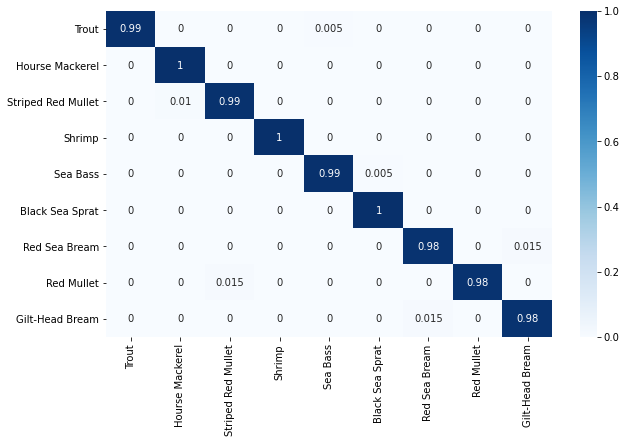

In [28]:
cf_matrix = metrics.confusion_matrix(actual, pred, normalize = 'true')
plt.figure(figsize = (10, 6))
sns.heatmap(cf_matrix, annot = True, xticklabels = columns[:9], yticklabels = columns[:9], cmap = 'Blues')